# EDA dan Preprocessing

In [217]:
import pandas as pd

data = pd.read_csv("DATASE_1.csv")
data.head()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N


In [218]:
print(data["Diabetic/NonDiabetic (D/N)"].value_counts())

Diabetic/NonDiabetic (D/N)
D    16641
N      328
Name: count, dtype: int64


In [219]:
data.shape

(16969, 10)

In [220]:
data.dtypes

Age                             int64
Blood Glucose Level(BGL)        int64
Diastolic Blood Pressure        int64
Systolic Blood Pressure         int64
Heart Rate                      int64
Body Temperature              float64
SPO2                            int64
Sweating  (Y/N)                 int64
Shivering (Y/N)                 int64
Diabetic/NonDiabetic (D/N)     object
dtype: object

In [221]:
data.isnull().isna().sum()

Age                           0
Blood Glucose Level(BGL)      0
Diastolic Blood Pressure      0
Systolic Blood Pressure       0
Heart Rate                    0
Body Temperature              0
SPO2                          0
Sweating  (Y/N)               0
Shivering (Y/N)               0
Diabetic/NonDiabetic (D/N)    0
dtype: int64

In [222]:
import pandas as pd  
 
duplikat = data.duplicated()  
print(data[duplikat])  
 
print(f"Jumlah duplikat data: {duplikat.sum()}")  


       Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
14737    9                        83                        74   
14740    9                        83                        85   
14749    9                        83                        70   
14761    9                        83                        89   
14776    9                        83                        90   
...    ...                       ...                       ...   
15910    9                        82                        83   
15911    9                        75                        78   
15916   14                        79                        70   
15926   14                        86                        76   
15927   14                        76                        70   

       Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
14737                      116          82         98.548571    97   
14740                      112          92         96.761555    97 

mengatasi data imbalenced

MEnghapus duplikasi data dan ubah kategori menjadi numerik

In [223]:
data_clean1 = data.drop_duplicates()
data_clean1["Diabetic/NonDiabetic (D/N)"] = data_clean1["Diabetic/NonDiabetic (D/N)"].map({"D": 1, "N": 0})

print(data_clean1.head(4))
print(data_clean1.shape)


   Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
0    9                        79                        73   
1    9                        80                        73   
2    9                        70                        76   
3    9                        70                        78   

   Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
0                      118          98         98.300707    99   
1                      119         102         98.300707    94   
2                      110          81         98.300707    98   
3                      115          96         98.300707    96   

   Sweating  (Y/N)  Shivering (Y/N)  Diabetic/NonDiabetic (D/N)  
0                0                0                           0  
1                1                0                           0  
2                1                0                           0  
3                1                0                           0  
(16701, 10)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7008\1320495540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean1["Diabetic/NonDiabetic (D/N)"] = data_clean1["Diabetic/NonDiabetic (D/N)"].map({"D": 1, "N": 0})


menghanddle imbalech pada data

In [224]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X_clean = data_clean1.drop(columns=["Diabetic/NonDiabetic (D/N)"])
y_clean = data_clean1["Diabetic/NonDiabetic (D/N)"]

over = SMOTE(sampling_strategy=1.0, random_state=42) 
X_resampled, y_resampled = over.fit_resample(X_clean, y_clean)

df_resampled = pd.DataFrame(X_resampled, columns=X_clean.columns)
df_resampled["Diabetic/NonDiabetic (D/N)"] = y_resampled

df_resampled.to_csv("dataset_resampled.csv", index=False)

print("Dataset setelah resampling telah disimpan sebagai 'dataset_resampled.csv'")


Dataset setelah resampling telah disimpan sebagai 'dataset_resampled.csv'


In [225]:
cek_data = data_clean1
cek_data.head(4)

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,0
1,9,80,73,119,102,98.300707,94,1,0,0
2,9,70,76,110,81,98.300707,98,1,0,0
3,9,70,78,115,96,98.300707,96,1,0,0


In [226]:
print(cek_data["Diabetic/NonDiabetic (D/N)"].value_counts())

Diabetic/NonDiabetic (D/N)
1    16373
0      328
Name: count, dtype: int64


In [227]:
cek_data.describe()

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
count,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000
mean,31.162326,96.004551,77.086043,118.182504,91.605533,97.355466,97.379378,0.123645,0.147895,0.980360
std,25.603414,43.275520,7.224109,7.724197,10.451563,0.812971,0.851988,0.329186,0.355007,0.138762
min,9.000000,50.000000,60.000000,95.000000,78.000000,96.000132,93.000000,0.000000,0.000000,0.000000
25%,9.000000,68.000000,71.000000,113.000000,84.000000,96.674465,97.000000,0.000000,0.000000,1.000000
50%,14.000000,84.000000,76.000000,118.000000,89.000000,97.324101,98.000000,0.000000,0.000000,1.000000
75%,55.000000,108.000000,83.000000,124.000000,95.000000,97.948069,98.000000,0.000000,0.000000,1.000000
max,77.000000,250.000000,98.000000,145.000000,130.000000,98.999792,99.000000,1.000000,1.000000,1.000000


In [228]:
cek_data.columns

Index(['Age', 'Blood Glucose Level(BGL)', 'Diastolic Blood Pressure',
       'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2',
       'Sweating  (Y/N)', 'Shivering (Y/N)', 'Diabetic/NonDiabetic (D/N)'],
      dtype='object')

In [229]:
print(cek_data.shape)
print(cek_data.head())

(16701, 10)
   Age  Blood Glucose Level(BGL)  Diastolic Blood Pressure  \
0    9                        79                        73   
1    9                        80                        73   
2    9                        70                        76   
3    9                        70                        78   
4   66                       100                        96   

   Systolic Blood Pressure  Heart Rate  Body Temperature  SPO2  \
0                      118          98         98.300707    99   
1                      119         102         98.300707    94   
2                      110          81         98.300707    98   
3                      115          96         98.300707    96   
4                      144          92         97.807052    98   

   Sweating  (Y/N)  Shivering (Y/N)  Diabetic/NonDiabetic (D/N)  
0                0                0                           0  
1                1                0                           0  
2                1  

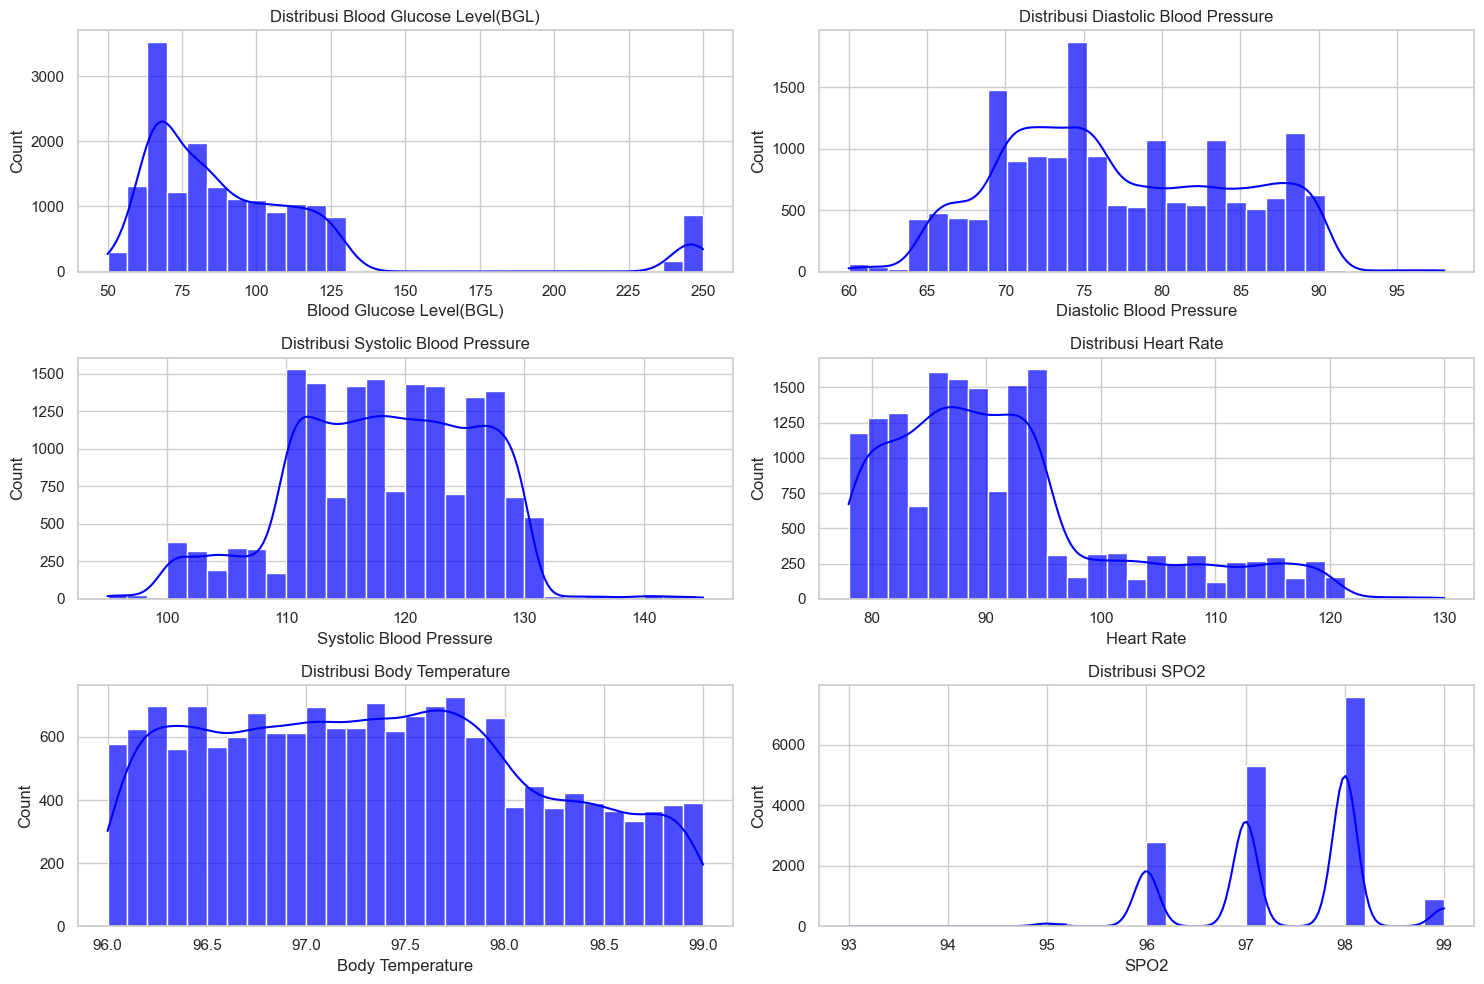

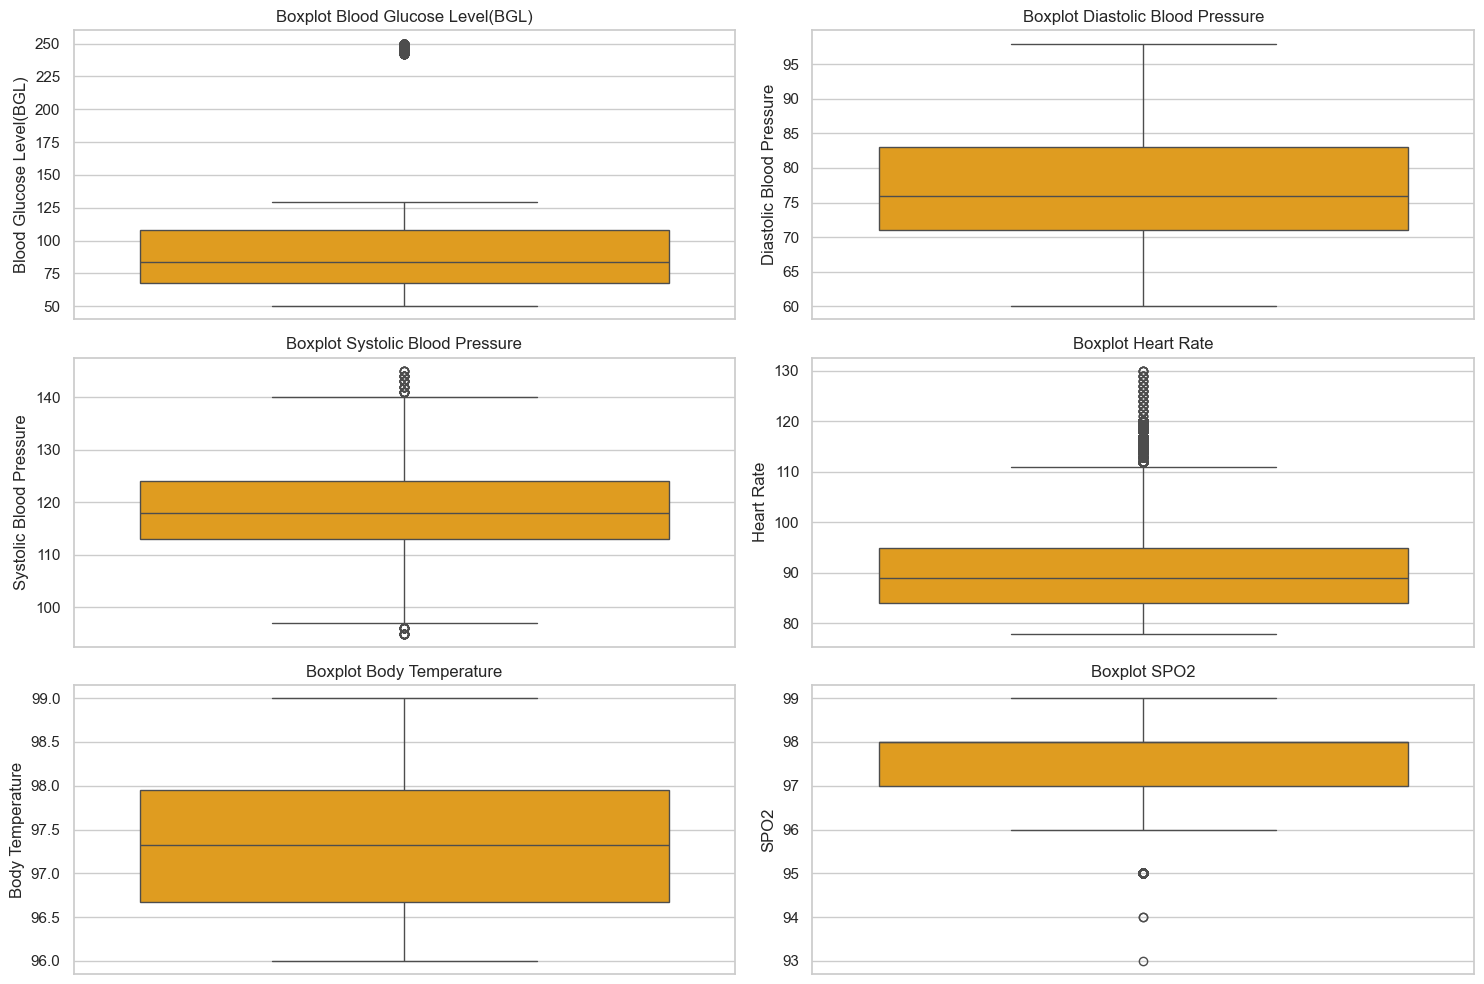

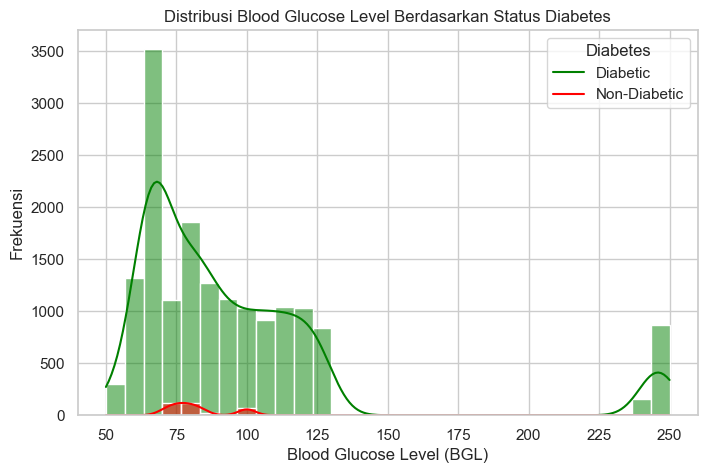

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_cols = ["Blood Glucose Level(BGL)", "Diastolic Blood Pressure", 
                "Systolic Blood Pressure", "Heart Rate", "Body Temperature", "SPO2"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(cek_data[col], bins=30, kde=True, color="blue", alpha=0.7)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=cek_data[col], color="orange")
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(cek_data, x="Blood Glucose Level(BGL)", hue="Diabetic/NonDiabetic (D/N)", 
             bins=30, kde=True, palette={0: "red", 1: "green"}, alpha=0.5)
plt.title("Distribusi Blood Glucose Level Berdasarkan Status Diabetes")
plt.xlabel("Blood Glucose Level (BGL)")
plt.ylabel("Frekuensi")
plt.legend(title="Diabetes", labels=["Diabetic", "Non-Diabetic"])
plt.show()


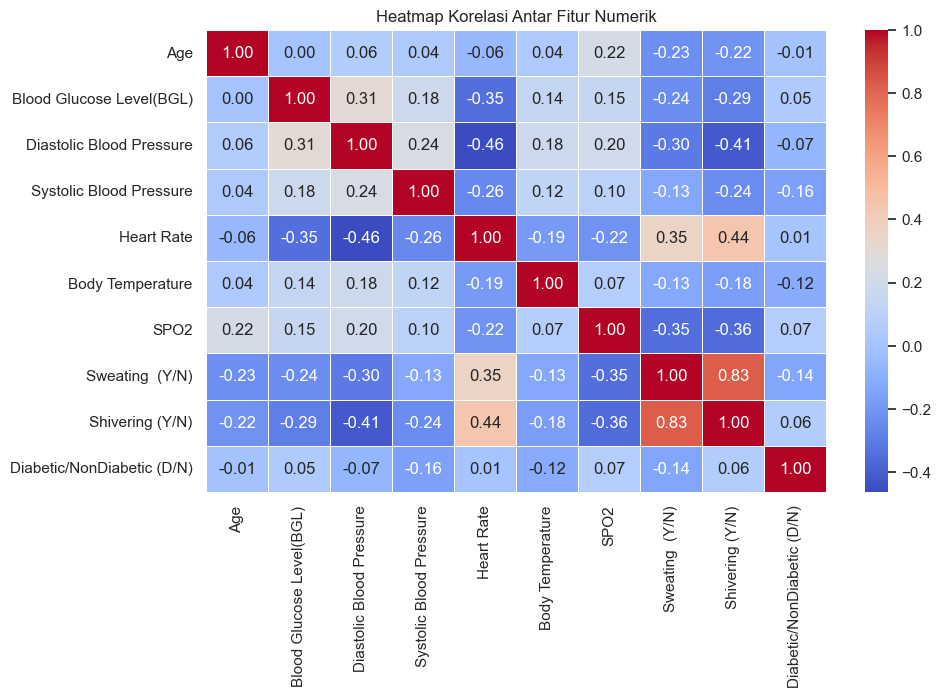

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung korelasi antar fitur numerik
correlation_matrix = cek_data.corr()

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7008\3983072660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cek_data['Age Group'] = pd.cut(cek_data['Age'], bins=bins, labels=labels, right=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7008\3983072660.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sweating = cek_data.groupby(['Age Group', 'Sweating  (Y/N)']).size().unstack()


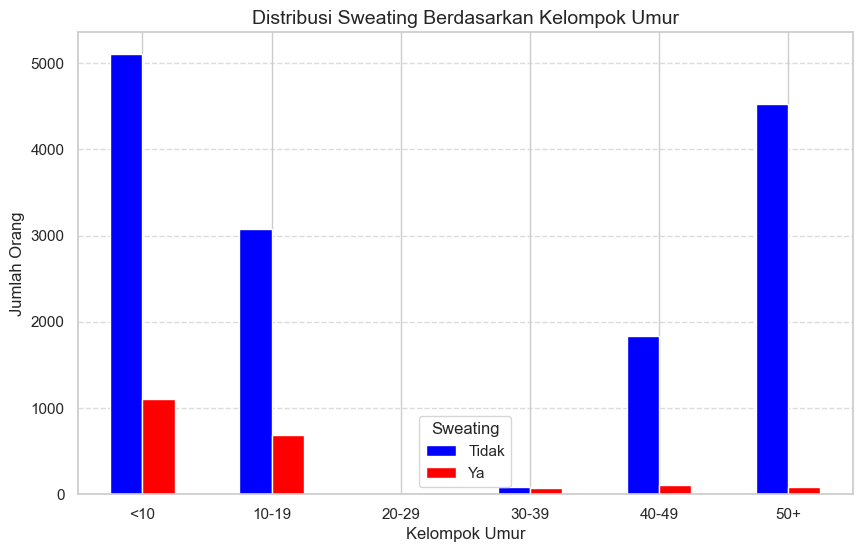

In [232]:
# Buat kategori kelompok umur
bins = [0, 10, 19, 29, 39, 50, 100]  # Rentang umur
labels = ['<10', '10-19', '20-29', '30-39', '40-49', '50+']

cek_data['Age Group'] = pd.cut(cek_data['Age'], bins=bins, labels=labels, right=True)

# Hitung jumlah orang dengan/ tanpa sweating di setiap kelompok umur
age_sweating = cek_data.groupby(['Age Group', 'Sweating  (Y/N)']).size().unstack()

# Plot side-by-side bar chart
age_sweating.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])  # Warna custom


# Styling
plt.title("Distribusi Sweating Berdasarkan Kelompok Umur", fontsize=14)
plt.xlabel("Kelompok Umur", fontsize=12)
plt.ylabel("Jumlah Orang", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sweating", labels=["Tidak", "Ya"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.show()


Menangani data imbalenc dan Normalisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

data_for_model = data_clean1
data_for_model = data_for_model.drop(columns=["Age Group"])

# Acak data
data_for_model = data_for_model.sample(frac=1, random_state=42).reset_index(drop=True)

X = data_for_model.drop(columns=['Diabetic/NonDiabetic (D/N)'])
y = data_for_model['Diabetic/NonDiabetic (D/N)']

# Split data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Lakukan Undersampling hanya pada Train Set
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  

df_X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
df_y_train = pd.DataFrame(y_train_resampled, columns=['Diabetic/NonDiabetic (D/N)'])
df_y_test = pd.DataFrame(y_test, columns=['Diabetic/NonDiabetic (D/N)'])

df_X_train.to_csv("X_train.csv", index=False)
df_X_test.to_csv("X_test.csv", index=False)
df_y_train.to_csv("y_train.csv", index=False)
df_y_test.to_csv("y_test.csv", index=False)

print("Dataset telah disimpan sebagai X_train.csv, X_test.csv, y_train.csv, y_test.csv.")


Dataset telah disimpan sebagai X_train.csv, X_test.csv, y_train.csv, y_test.csv.


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

train_data_scaled = pd.concat([X_train_scaled, y_train.reset_index(drop=True)], axis=1)
test_data_scaled = pd.concat([X_test_scaled, y_test.reset_index(drop=True)], axis=1)

data_train = train_data_scaled.to_csv("data train.csv", index=False)
data_test = test_data_scaled.to_csv("data test.csv", index=False)

# Model Backpropagation Menggunakan Aktifasi Sigmoid

In [235]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [236]:
def sigmoid_turunan(x):
    return x * (1 - x)

In [237]:
def initialize_weights(input_size, hidden_size, output_size):
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

In [238]:
def forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)
    return hidden_input, hidden_output, output_input, output


In [239]:
def backpropagation(X, y, hidden_input, hidden_output, output_input, output, 
                    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate):
    output_error = y - output
    output_delta = output_error * sigmoid_turunan(output)
    
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_turunan(hidden_output)
    
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate


    
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output


In [240]:
def train_backpro_sigmoid(X, y, input_size, hidden_size, output_size, learning_rate, epochs):
    np.random.seed(42)
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_weights(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            hidden_input, hidden_output, output_input, output = forward_propagation(X[i], weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
            
            error = y[i] - output
            total_loss += np.mean(error ** 2)
            
            weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = backpropagation(
                X[i].reshape(1, -1), y[i].reshape(1, -1), hidden_input, hidden_output, output_input, output,
                weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate)
        
        print(f"Epoch {epoch}, Loss: {total_loss / len(X)}")
    
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

In [241]:
def predict(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    _, _, _, final_output = forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
    return final_output

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.metrics import confusion_matrix

X_train = pd.read_csv("X_train.csv").values  
y_train = pd.read_csv("y_train.csv").values

X_test = pd.read_csv("X_test.csv").values
y_test = pd.read_csv("y_test.csv").values 

input_size = X_train.shape[1]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 50

start_train = time.time()
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train_backpro_sigmoid(X_train, y_train, input_size, hidden_size, output_size, learning_rate, epochs)
end_train = time.time()
train_time = end_train - start_train

start_test = time.perf_counter()
y_pred = predict(X_test, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
end_test = time.perf_counter()

test_time = end_test - start_test

# Konversi probabilitas ke kelas (0 atau 1)
y_pred_class = (y_pred > 0.5).astype(int)  

precision = precision_score(y_test, y_pred_class, average='binary')
recall = recall_score(y_test, y_pred_class, average='binary')
hasil_f1_score = f1_score(y_test, y_pred_class, average='binary')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()

# Hitung Specificity
specificity = tn / (tn + fp)

print(f"Specificity: {specificity:.4f}")

accuracy = accuracy_score(y_test, y_pred_class)




Epoch 0, Loss: 0.2905582327475984
Epoch 1, Loss: 0.2569780228813721
Epoch 2, Loss: 0.24451199288568937
Epoch 3, Loss: 0.24176985857338623
Epoch 4, Loss: 0.2412782550864329
Epoch 5, Loss: 0.24072153854182654
Epoch 6, Loss: 0.23970041539501788
Epoch 7, Loss: 0.23827891528388687
Epoch 8, Loss: 0.23657596396438402
Epoch 9, Loss: 0.23468062603058643
Epoch 10, Loss: 0.23264800925254708
Epoch 11, Loss: 0.23050976204264848
Epoch 12, Loss: 0.22828374790759157
Epoch 13, Loss: 0.2259805825080084
Epoch 14, Loss: 0.22360759236499408
Epoch 15, Loss: 0.22117105688069746
Epoch 16, Loss: 0.21867738086671937
Epoch 17, Loss: 0.21613361443052886
Epoch 18, Loss: 0.21354757893778656
Epoch 19, Loss: 0.2109277625464089
Epoch 20, Loss: 0.20828309322276298
Epoch 21, Loss: 0.20562266302231258
Epoch 22, Loss: 0.2029554538610237
Epoch 23, Loss: 0.2002900967477196
Epoch 24, Loss: 0.19763468164487108
Epoch 25, Loss: 0.19499662353388808
Epoch 26, Loss: 0.19238258202182867
Epoch 27, Loss: 0.18979842684794526
Epoch 28,

In [247]:
print(f"Akurasi Model: {accuracy:.4f}")
print(f"Waktu Training: {train_time:.4f} detik")
print(f"Waktu Testing: {test_time:.4f} detik")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Measure: {hasil_f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")

Akurasi Model: 0.9787
Waktu Training: 3.0751 detik
Waktu Testing: 0.0029 detik
Precision: 0.9884
Recall (Sensitivity): 0.9899
F1-Measure: 0.9892
Specificity: 0.4242


In [244]:
# Simpan hasil prediksi ke dalam CSV
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred_df.to_csv("y_predicted.csv", index=False)

print("Hasil_Predik_BackproSigmo.csv")


Hasil_Predik_BackproSigmo.csv


In [245]:
y_pred_class = (y_pred > 0.5).astype(int)  # Konversi ke 0 atau 1
y_pred_df = pd.DataFrame(y_pred_class, columns=['Predicted_Class'])
y_pred_df.to_csv("y_predicted_classes.csv", index=False)


# Model Backpropagation Menggunakan Aktifasi TaNh

### Mengubah kolom "Diabetic/NonDiabetic (D/N)" menjadi bipolar yang sebelumnya Binary

In [248]:
# Fungsi aktivasi Tanh
def tanh(x):
    return np.tanh(x)

# Turunan fungsi aktivasi Tanh
def tanh_derivative(x):
    return 1 - np.tanh(x)**2



In [249]:
def initialize_weights(input_size, hidden_size, output_size):
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
    bias_output = np.random.uniform(-1, 1, (1, output_size))
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

In [250]:
def forward_propagation_Tanh(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = tanh(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = tanh(output_input)
    return hidden_input, hidden_output, output_input, output

In [251]:
def backpropagation_Tanh(X, y, hidden_input, hidden_output, output_input, output, 
                    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate):
    output_error = y - output
    output_delta = output_error * tanh_derivative(output_input)
    
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * tanh_derivative(hidden_input)

    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output


In [252]:
def train_backpro_Tanh(X, y, input_size, hidden_size, output_size, learning_rate, epochs):
    np.random.seed(42)
    weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = initialize_weights(input_size, hidden_size, output_size)
    
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            hidden_input, hidden_output, output_input, output = forward_propagation_Tanh(X[i], weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
            
            error = y[i] - output
            total_loss += np.mean(error ** 2)
            
            weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = backpropagation_Tanh(
                X[i].reshape(1, -1), y[i].reshape(1, -1), hidden_input, hidden_output, output_input, output,
                weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, learning_rate)
        
        print(f"Epoch {epoch}, Loss: {total_loss / len(X)}")
    
    return weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

In [253]:
def predict(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output):
    _, _, _, final_output = forward_propagation(X, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
    return final_output

In [255]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import time

X_train = pd.read_csv("X_train.csv").values  
y_train_df = pd.read_csv("y_train.csv").values
X_test = pd.read_csv("X_test.csv").values
y_test = pd.read_csv("y_test.csv").values 

y_trainmins = y_train_df * 2 - 1
y_testmins = y_test * 2 - 1

# Konversi ke DataFrame untuk value_counts()
y_test_df = pd.DataFrame(y_testmins, columns=["Diabetic/NonDiabetic (D/N)"])
y_train_df = pd.DataFrame(y_trainmins, columns=["Diabetic/NonDiabetic (D/N)"])


# Hitung jumlah masing-masing kelas
print(y_test_df["Diabetic/NonDiabetic (D/N)"].value_counts())

# Print data y_trainmins
print(y_train_df["Diabetic/NonDiabetic (D/N)"].value_counts())

input_size = X_train.shape[1]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 50

start_train = time.time()
weights_input_hidden, weights_hidden_output, bias_hidden, bias_output = train_backpro_Tanh(X_train, y_trainmins, input_size, hidden_size, output_size, learning_rate, epochs)
end_train = time.time()
train_time = end_train - start_train

start_test = time.perf_counter()
y_pred = predict(X_test, weights_input_hidden, weights_hidden_output, bias_hidden, bias_output)
end_test = time.perf_counter()

test_time = end_test - start_test

y_pred_class = np.where(y_pred > 0, 1, -1) 

precision = precision_score(y_test_df, y_pred_class, average='binary',pos_label=1)
recall = recall_score(y_test_df, y_pred_class, average='binary',pos_label=1)
hasil_f1_score = f1_score(y_test_df, y_pred_class, average='binary',pos_label=1)
accuracy = accuracy_score(y_test_df, y_pred_class)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()

# Hitung Specificity
specificity = tn / (tn + fp)

print(f"Specificity: {specificity:.4f}")

Diabetic/NonDiabetic (D/N)
 1    3275
-1      66
Name: count, dtype: int64
Diabetic/NonDiabetic (D/N)
-1    262
 1    262
Name: count, dtype: int64
Epoch 0, Loss: 0.5030456921373198
Epoch 1, Loss: 0.3574699706658344
Epoch 2, Loss: 0.22961936688075368
Epoch 3, Loss: 0.18706708485805146
Epoch 4, Loss: 0.16906498176860146
Epoch 5, Loss: 0.15913404076105256
Epoch 6, Loss: 0.15267084753697316
Epoch 7, Loss: 0.14817346682405816
Epoch 8, Loss: 0.14493515640733542
Epoch 9, Loss: 0.1425382273021191
Epoch 10, Loss: 0.14072176669266703
Epoch 11, Loss: 0.13932052599978306
Epoch 12, Loss: 0.13822748890110742
Epoch 13, Loss: 0.1373707406933637
Epoch 14, Loss: 0.13669975567660175
Epoch 15, Loss: 0.13617748305489158
Epoch 16, Loss: 0.13577578699170562
Epoch 17, Loss: 0.13547275593094774
Epoch 18, Loss: 0.13525103949758702
Epoch 19, Loss: 0.13509675529721926
Epoch 20, Loss: 0.13499872233168406
Epoch 21, Loss: 0.1349478926614931
Epoch 22, Loss: 0.13493691289705478
Epoch 23, Loss: 0.13495977777839077
Epo

In [256]:
print(f"Akurasi Model: {accuracy:.4f}")
print(f"Waktu Training: {train_time:.4f} detik")
print(f"Waktu Testing: {test_time:.4f} detik")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1-Measure: {hasil_f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")

Akurasi Model: 0.9802
Waktu Training: 2.9981 detik
Waktu Testing: 0.0007 detik
Precision: 0.9802
Recall (Sensitivity): 1.0000
F1-Measure: 0.9900
Specificity: 0.0000


In [259]:
y_pred_df = pd.DataFrame(y_pred_class, columns=['Predicted_Class'])
y_pred_df.to_csv("y_predicted_Tanh.csv", index=False)

# Model FNGLVQ Untuk Perbandingan

In [260]:
def initialize_prototypes(X_train, y_train, num_classes):
    w_min = np.array([X_train[y_train == j].min(axis=0) for j in range(num_classes)])
    w_mean = np.array([X_train[y_train == j].mean(axis=0) for j in range(num_classes)])
    w_max = np.array([X_train[y_train == j].max(axis=0) for j in range(num_classes)])
    return w_min, w_mean, w_max

In [261]:
def triangular_membership(x, w_min, w_mean, w_max):
    if x <= w_min or x >= w_max:
        return 0
    elif w_min < x <= w_mean:
        return (x - w_min) / (w_mean - w_min)
    elif w_mean < x < w_max:
        return (w_max - x) / (w_max - w_mean)
    else:
        return 0

In [262]:
def similarity(x, w_min, w_mean, w_max):
    membership_values = [triangular_membership(x[i], w_min[i], w_mean[i], w_max[i]) for i in range(len(x))]
    return np.mean(membership_values)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def MCE(mu1, mu2):
    return (mu2 - mu1) / (2 - mu1 - mu2)

In [263]:
def update_mean(x, idk_ru, idk_win, w_mean, alpha, w_min, w_max, mu1, mu2):
    for i in range(x.shape[0]):
        delta = alpha * sigmoid(MCE(mu1, mu2)) * (1 - sigmoid(MCE(mu1, mu2))) * (2 * (1 - mu2) / (2 - mu1 - mu2)**2)
        if w_min[idk_win][i] < x[i] <= w_mean[idk_win][i]:
            w_mean[idk_win][i] -= delta * (x[i] - w_min[idk_win][i]) / (w_mean[idk_win][i] - w_min[idk_win][i])
            w_mean[idk_ru][i] += delta * (x[i] - w_min[idk_ru][i]) / (w_mean[idk_ru][i] - w_min[idk_ru][i])
        elif w_mean[idk_win][i] < x[i] < w_max[idk_win][i]:
            w_mean[idk_win][i] += delta * (w_max[idk_win][i] - x[i]) / (w_max[idk_win][i] - w_mean[idk_win][i])
            w_mean[idk_ru][i] -= delta * (w_max[idk_win][i] - x[i]) / (w_max[idk_win][i] - w_mean[idk_win][i])
    return w_mean

In [264]:
def update_bounds(x, w_min, w_max, w_mean, mu1, mu2, phi, alpha, beta, gamma):
    if mu1 > 0 or mu2 > 0:
        factor = 1 + (beta * alpha) if phi < 0 else 1 - (beta * alpha)
    else:
        factor = 1 - (alpha * gamma)
    w_min = w_mean - (w_mean - w_min) * factor
    w_max = w_mean + (w_max - w_mean) * factor
    return w_min, w_max

In [265]:
def train_fn_glvq(X_train, y_train, w_min, w_mean, w_max, learning_rate, beta, gamma, epochs):
    num_classes = len(w_min)
    for epoch in range(epochs):
        n_miss = 0
        for i in range(len(X_train)):
            x, label = X_train[i], y_train[i]
            mu_values = sorted([(similarity(x, w_min[j], w_mean[j], w_max[j]), j) for j in range(num_classes)], reverse=True)
            
            idk_win, idk_ru = (0, 1) if mu_values[0][1] == label else (next(j for j, (_, cls) in enumerate(mu_values) if cls == label), 0)
            mu1, mu2 = mu_values[idk_win][0], mu_values[idk_ru][0]
            phi = MCE(mu1, mu2)
            
            w_mean = update_mean(x, idk_ru, idk_win, w_mean, learning_rate, w_min, w_max, mu1, mu2)
            w_min[idk_win], w_max[idk_win] = update_bounds(x, w_min[idk_win], w_max[idk_win], w_mean[idk_win], mu1, mu2, phi, learning_rate, beta, gamma)
            w_min[idk_ru], w_max[idk_ru] = update_bounds(x, w_min[idk_ru], w_max[idk_ru], w_mean[idk_ru], mu1, mu2, phi, learning_rate, beta, gamma)
            
            if idk_win != 0:
                n_miss += 1
        print(f"Epoch {epoch + 1}: Total Miss = {n_miss}")
    return w_min, w_mean, w_max

In [266]:
def evaluate_fn_glvq(X_test, y_test, w_min, w_mean, w_max):
    correct = 0
    for i in range(len(X_test)):
        x, label = X_test[i], y_test[i]
        mu_values = sorted([(similarity(x, w_min[j], w_mean[j], w_max[j]), j) for j in range(len(w_min))], reverse=True)
        if mu_values[0][1] == label:
            correct += 1
    accuracy = correct / len(X_test) * 100
    print(f"Final Accuracy: {accuracy:.2f}%")
    return accuracy

In [267]:
def predict_fn_glvq(X_test, w_min, w_mean, w_max):
    y_pred = []
    for x in X_test:
        mu_values = [(similarity(x, w_min[j], w_mean[j], w_max[j]), j) for j in range(len(w_min))]
        predicted_label = max(mu_values, key=lambda x: x[0])[1]
        y_pred.append(predicted_label)
    return np.array(y_pred)


In [271]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train = pd.read_csv("X_train.csv").values  
y_train = pd.read_csv("y_train.csv").values

X_test = pd.read_csv("X_test.csv").values
y_test = pd.read_csv("y_test.csv").values 

num_classes = len(set(y_train.ravel()))
y_train = y_train.ravel()

w_min, w_mean, w_max = initialize_prototypes(X_train, y_train, num_classes)

learning_rate = 0.01     
beta = 0.00005  
gamma = 0.1     
epochs = 200

start_time = time.time()
w_min, w_mean, w_max = train_fn_glvq(X_train, y_train, w_min, w_mean, w_max, learning_rate, beta, gamma, epochs)
train_time = time.time() - start_time

start_time = time.time()
y_pred = predict_fn_glvq(X_test, w_min, w_mean, w_max)  
test_time = time.time() - start_time

accuracy = evaluate_fn_glvq(X_test, y_test, w_min, w_mean, w_max)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Waktu Training: {train_time:.4f} detik")
print(f"Waktu Testing: {test_time:.4f} detik")
print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Measure: {f1:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7008\2330068272.py:6: RuntimeWarning: invalid value encountered in scalar divide
  w_mean[idk_ru][i] += delta * (x[i] - w_min[idk_ru][i]) / (w_mean[idk_ru][i] - w_min[idk_ru][i])


Epoch 1: Total Miss = 188
Epoch 2: Total Miss = 194
Epoch 3: Total Miss = 217
Epoch 4: Total Miss = 209
Epoch 5: Total Miss = 209
Epoch 6: Total Miss = 213
Epoch 7: Total Miss = 205
Epoch 8: Total Miss = 199
Epoch 9: Total Miss = 208
Epoch 10: Total Miss = 207
Epoch 11: Total Miss = 188
Epoch 12: Total Miss = 199
Epoch 13: Total Miss = 214
Epoch 14: Total Miss = 209
Epoch 15: Total Miss = 209
Epoch 16: Total Miss = 205
Epoch 17: Total Miss = 208
Epoch 18: Total Miss = 206
Epoch 19: Total Miss = 211
Epoch 20: Total Miss = 207
Epoch 21: Total Miss = 192
Epoch 22: Total Miss = 213
Epoch 23: Total Miss = 205
Epoch 24: Total Miss = 193
Epoch 25: Total Miss = 184
Epoch 26: Total Miss = 166
Epoch 27: Total Miss = 160
Epoch 28: Total Miss = 210
Epoch 29: Total Miss = 206
Epoch 30: Total Miss = 193
Epoch 31: Total Miss = 187
Epoch 32: Total Miss = 182
Epoch 33: Total Miss = 173
Epoch 34: Total Miss = 168
Epoch 35: Total Miss = 165
Epoch 36: Total Miss = 165
Epoch 37: Total Miss = 163
Epoch 38: 

In [272]:
print(f"Waktu Training: {train_time:.4f} detik")
print(f"Waktu Testing: {test_time:.4f} detik")
print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Measure: {f1:.4f}")
print(f"Sensitivity (Recall): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")

Waktu Training: 16.8022 detik
Waktu Testing: 0.1118 detik
Akurasi: 78.2700
F1-Measure: 0.4800
Sensitivity (Recall): 0.6442
Specificity: 0.5000


In [270]:
df_pred = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_pred})
df_pred.to_csv("hasil_prediksi_FN-GLVQ.csv", index=False)